# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [1]:
%matplotlib inline
import pandas as pd

filename = "../../assets/datasets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

# We need to process the dates to be datetime variables
data["sale_date"] = pd.to_datetime(data["sale_date"])

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price".

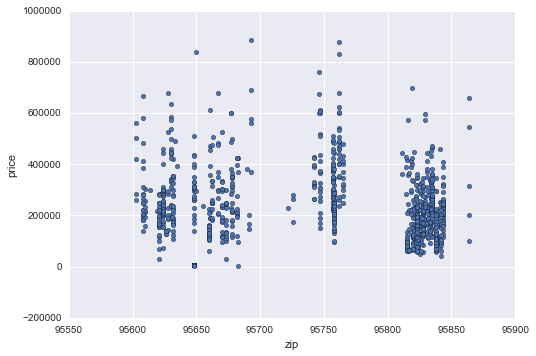

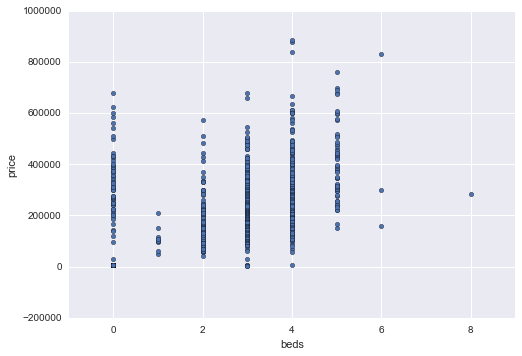

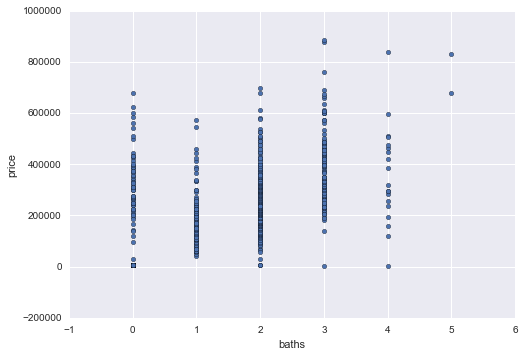

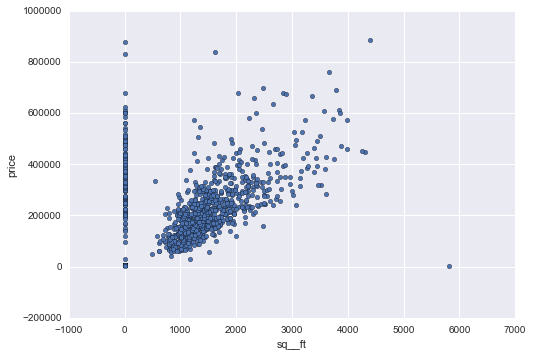

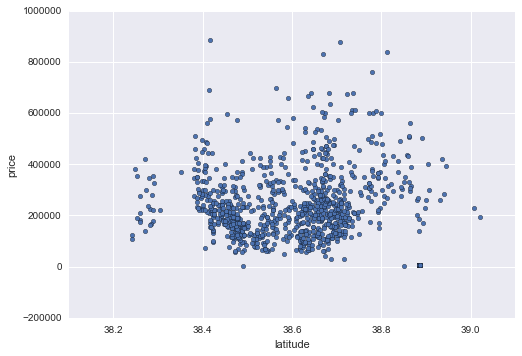

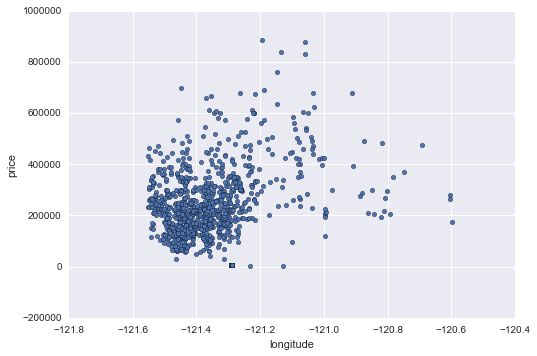

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

# There are many valid solutions.

# For the numerical variables
for column in ["zip", "beds", "baths", "sq__ft", "latitude", "longitude"]:
    data.plot.scatter(x=column, y="price")

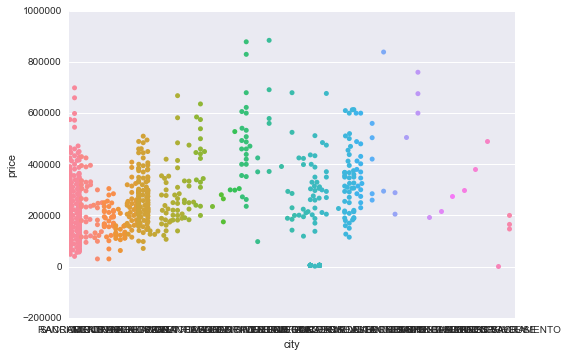

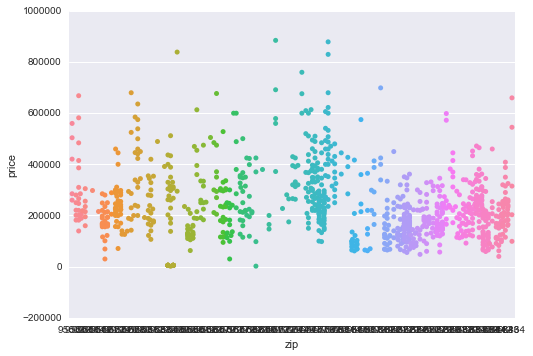

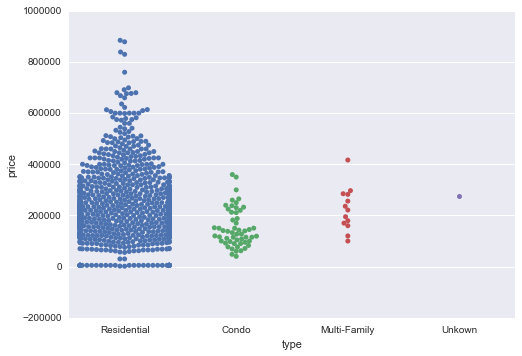

In [3]:
# For the categorical variables
for column in ["city", "zip", "type"]:
    sns.swarmplot(x=column, y="price", data=data);
    sns.plt.show()

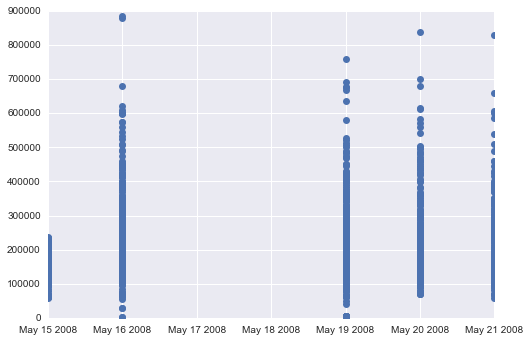

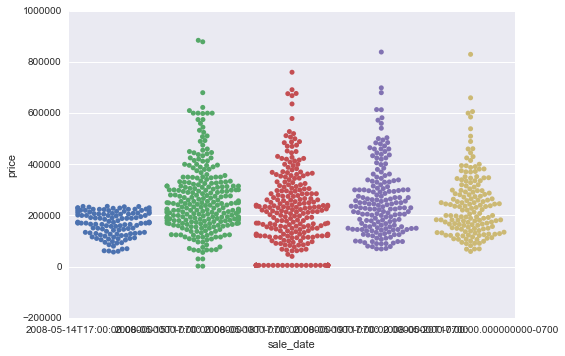

In [4]:
# For date:

plt.plot_date(data["sale_date"], data["price"])
plt.show()

# or better yet

sns.swarmplot(x="sale_date", y="price", data=data);
sns.plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

### Solutions

Solutions will vary greatly per student depending on the variables they choose and the toolkit. Look for students using `mean_squared_error` to compare models. Good models will likely use the property type and square footage.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     667.6
Date:                Wed, 27 Jul 2016   Prob (F-statistic):               0.00
Time:                        15:13:42   Log-Likelihood:                -12922.
No. Observations:                 985   AIC:                         2.586e+04
Df Residuals:                     979   BIC:                         2.588e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
zip          293.7759     43.571      6.743      0.0

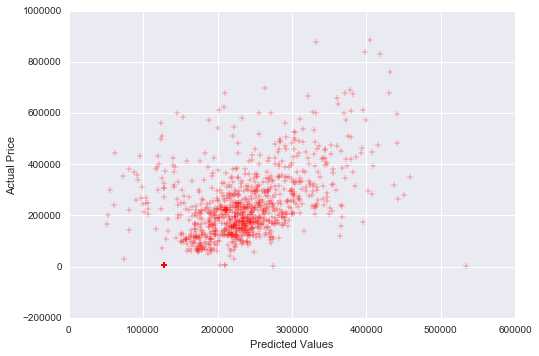

MSE: 9.75554035769e+12


In [5]:
import statsmodels.api as sm

X = data[["zip", "beds", "baths", "sq__ft", "latitude", "longitude"]]
y = data["price"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print model.summary()

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Price")
plt.show()
print "MSE:", model.mse_model


## Bonus Exercises

* Can you improve your models by fitting separate models to each city? To each type? Why or why not?
* Are there any data points that are significant outliers? Does you models improve if you remove these points?
* Find the best model you can with three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

### Again solutions will vary greatly depending on the variables the student uses. Just look for logical attempts to address the exercises.